<a href="https://colab.research.google.com/github/dilli-yaswanth21/CNN-Model-for-the-Plastic-Waste/blob/main/week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import kagglehub
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # Import load_img alongside ImageDataGenerator and img_to_array
# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [ ]:
pip install opencv-python

In [ ]:

pip install tensorflow


In [ ]:

pip install numpy pandas matplotlib tqdm


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

TRAIN AND TEST

In [ ]:
train_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing. image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

# Visualization

In [ ]:
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:07<00:00, 1580.28it/s]


In [ ]:
data.shape

(22564, 2)

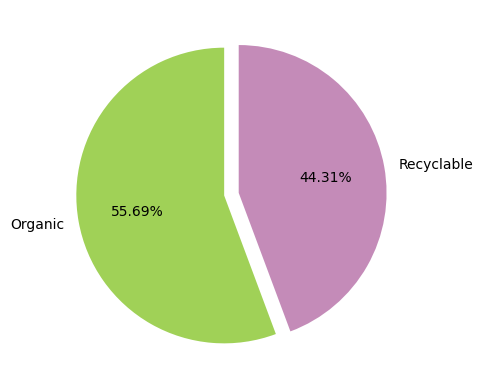

In [ ]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

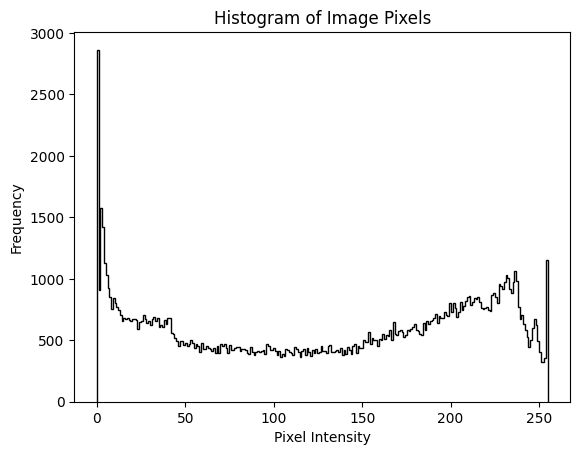

In [ ]:
def plot_image_histogram(image_path):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.hist(img.ravel(), bins=256, histtype='step', color='black')
    plt.title("Histogram of Image Pixels")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Example
image_path = "path_to_image.jpg"
plot_image_histogram(image_path)

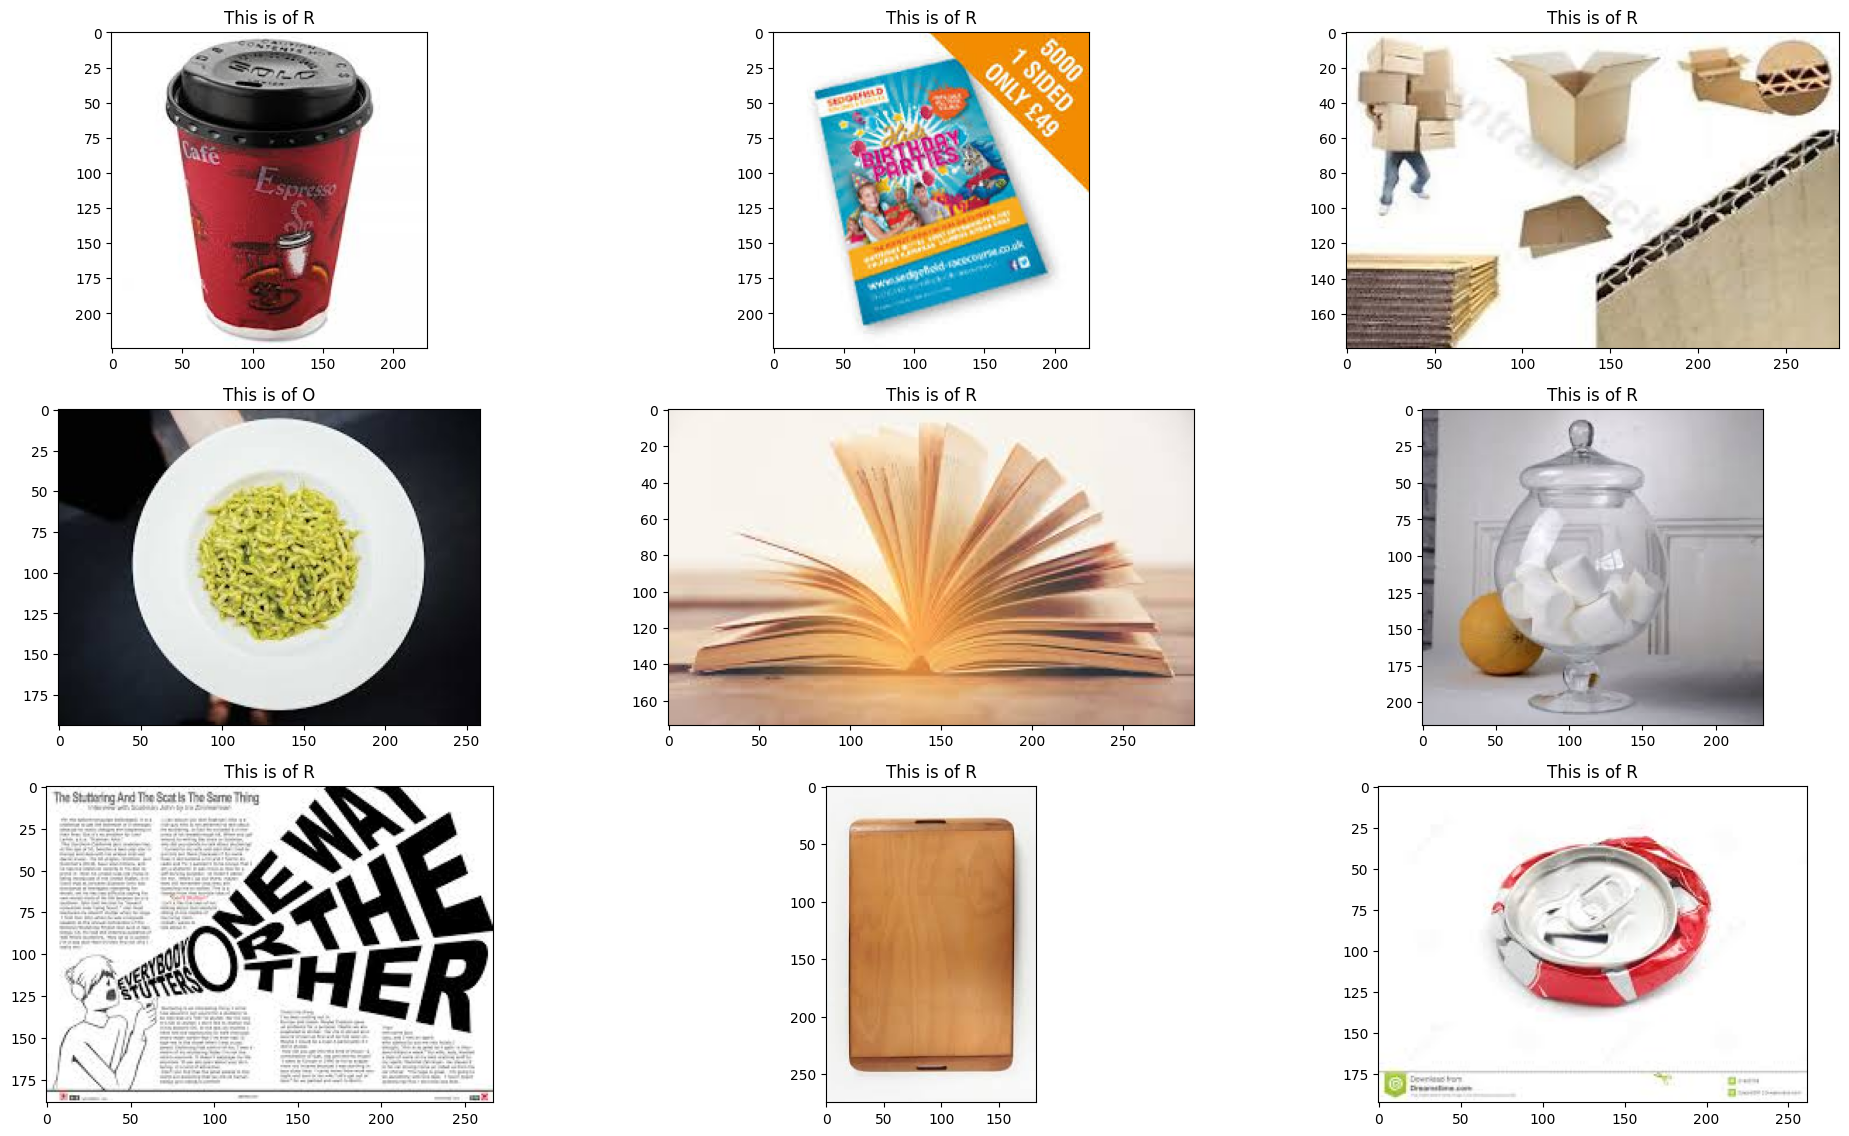

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",optimizer="adam",metrics=["accuracy"])
batch_size= 64

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,target_size= (224,224), batch_size= batch_size,color_mode= "rgb",class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(train_path,target_size= (224,224), batch_size= batch_size,color_mode= "rgb",class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [ ]:
hist = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 112s 285ms/step - accuracy: 0.7619 - loss: 0.5603 - val_accuracy: 0.8309 - val_loss: 0.4061
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 91s 257ms/step - accuracy: 0.8377 - loss: 0.4008 - val_accuracy: 0.8652 - val_loss: 0.3271
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 85s 240ms/step - accuracy: 0.8627 - loss: 0.3453 - val_accuracy: 0.8838 - val_loss: 0.2884
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 88s 249ms/step - accuracy: 0.8742 - loss: 0.3142 - val_accuracy: 0.8985 - val_loss: 0.2504
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 128s 364ms/step - accuracy: 0.8926 - loss: 0.2769 - val_accuracy: 0.9126 - val_loss: 0.2417
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 88s 249ms/step - accuracy: 0.9043 - loss: 0.2481 - val_accuracy: 0.9187 - val_loss: 0.2049
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 89s 252ms/step - accuracy: 0.9264 - loss: 0.1950 - val_accuracy: 0.9560 - val_loss: 0.1419
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 88s 250ms/step - accuracy: 0.9428 - loss:

In [10]:
img = load_img('/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN/O/O_2.jpg') # Now load_img should be recognized.
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

In [11]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)